In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# Handle CSV info

city_data1 = "city_data.csv"
ride_data1 = "ride_data.csv"

city_data_df = pd.read_csv(city_data1)
ride_data_df = pd.read_csv(ride_data1)

ride_data_df.head(5)


,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Merge CSV

combined_city_df = pd.merge(city_data_df, ride_data_df,
                                 how='outer', on='city')

combined_city_df.head(5)

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
clean_combined_city_df = combined_city_df.dropna(how="any")
clean_combined_city_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [113]:
# info needed for bubble chart

#* Average Fare ($) Per City
#* Total Number of Rides Per City
#* Total Number of Drivers Per City
#* City Type (Urban, Suburban, Rural)
## x value= total number of rides per city
## y value= average fare $
# color of bubbles by type

# info for pie chart

#* % of Total Fares by City Type
#* % of Total Rides by City Type
#* % of Total Drivers by City Type

#* You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
 # * When making your Bubble Plot, experiment with effects like `alpha`, `edgecolor`, and `linewidths`.
  #* When making your Pie Chart, experiment with effects like `shadow`, `startangle`, and `explosion`.

In [6]:
# Filter on city type

urban_type_df = clean_combined_city_df.loc[clean_combined_city_df["type"] == "Urban", :]
suburban_type_df = clean_combined_city_df.loc[clean_combined_city_df["type"] == "Suburban", :]
rural_type_df = clean_combined_city_df.loc[clean_combined_city_df["type"] == "Rural", :]

rural_type_df.head()


,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [7]:
# Urban cities average fare

urban_avg_fare = urban_type_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [ ]:
# Percentage of total urban fares



In [8]:
# Suburban cities average fare

suburban_avg_fare = suburban_type_df.groupby(["city"]).mean()["fare"]

suburban_avg_fare.head()


city
Barronchester    36.422500
Bethanyland      32.956111
Brandonfort      35.437368
Colemanland      30.894545
Davidfurt        31.995882
Name: fare, dtype: float64

In [ ]:
# Percentage of total suburban fares



In [9]:
# Rural cities average fare

rural_avg_fare = rural_type_df.groupby(["city"]).mean()["fare"]

rural_avg_fare.head()


city
Bradshawfurt      40.064000
Garzaport         24.123333
Harringtonfort    33.470000
Jessicaport       36.013333
Lake Jamie        34.358333
Name: fare, dtype: float64

In [ ]:
# Percentage of total rural fares



In [10]:
# Urban cities ride totals

urban_ride_total = urban_type_df.groupby(["city"]).count()["ride_id"]

urban_ride_total.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [ ]:
# Percentage of total urban rides



In [11]:
# Suburban cities ride totals

suburban_ride_total = suburban_type_df.groupby(["city"]).count()["ride_id"]

suburban_ride_total.head()


city
Barronchester    16
Bethanyland      18
Brandonfort      19
Colemanland      22
Davidfurt        17
Name: ride_id, dtype: int64

In [ ]:
# Percentage of total suburban rides



In [12]:
# Rural cities ride totals

rural_ride_total = rural_type_df.groupby(["city"]).count()["ride_id"]

rural_ride_total.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [ ]:
# Percentage of total rural rides



In [13]:
#Urban cities driver totals

urban_driver_total = urban_type_df.groupby(["city"]).mean()["driver_count"]

urban_driver_total.head()


city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

In [ ]:
# Percentage of total urban drivers



In [14]:
# Suburban cities total drivers

suburban_driver_total = suburban_type_df.groupby(["city"]).mean()["driver_count"]

suburban_driver_total.head()

city
Barronchester    11.0
Bethanyland      22.0
Brandonfort      10.0
Colemanland      23.0
Davidfurt        23.0
Name: driver_count, dtype: float64

In [ ]:
# Percentage of total suburban drivers



In [15]:
# Rural cities total drivers

rural_driver_total = rural_type_df.groupby(["city"]).mean()["driver_count"]

rural_driver_total.head()

city
Bradshawfurt      7.0
Garzaport         7.0
Harringtonfort    4.0
Jessicaport       1.0
Lake Jamie        4.0
Name: driver_count, dtype: float64

In [ ]:
# Percentage of total rural drivers



In [16]:
# New dataframe for suburban data

suburban_summary_table = pd.DataFrame({"Average Fare": suburban_avg_fare,
                                    "Total Rides": suburban_ride_total})
suburban_summary_table.head()

,Average Fare,Total Rides
city,,
Barronchester,36.422500,16
Bethanyland,32.956111,18
Brandonfort,35.437368,19
Colemanland,30.894545,22
Davidfurt,31.995882,17


In [17]:
# New dataframe for urban data

urban_summary_table = pd.DataFrame({"Average Fare": urban_avg_fare,
                                   "Total Rides": urban_ride_total})

urban_summary_table.head()

,Average Fare,Total Rides
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Carriemouth,28.314444,27
Christopherfurt,24.501852,27
Deanville,25.842632,19


In [18]:
# New dataframe for rural data

rural_summary_table = pd.DataFrame({"Average Fare": rural_avg_fare, 
                                   "Total Rides": rural_ride_total})

rural_summary_table.head()

,Average Fare,Total Rides
city,,
Bradshawfurt,40.064000,10
Garzaport,24.123333,3
Harringtonfort,33.470000,6
Jessicaport,36.013333,6
Lake Jamie,34.358333,6


In [ ]:
# Create new columns for total rides, total drivers, average fare



In [ ]:
# format for currency



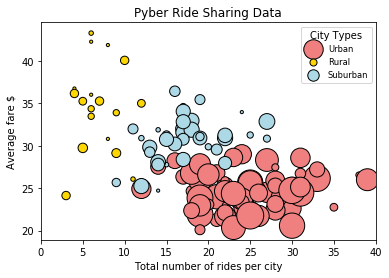

In [24]:
# Scatter plot data
plt.scatter(urban_ride_total, urban_avg_fare, s= 10 * urban_driver_total, c= "lightcoral", edgecolor = "black", label = "Urban")
plt.scatter(rural_ride_total, rural_avg_fare, s= 10 * rural_driver_total, c= "gold", edgecolor = "black", label = "Rural")
plt.scatter(suburban_ride_total, suburban_avg_fare, s= 10 * suburban_driver_total, c= "lightblue", edgecolor = "black", label = "Suburban")

# adding labels and adjusting x axis
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average fare $")
plt.xlabel("Total number of rides per city")
plt.xlim((0,40))

# create the legend
legend = plt.legend(
    fontsize="small",
    mode="Expanded",
    loc="best",
    title="City Types"
)

plt.savefig("ride_share_data.png")
plt.show()


In [27]:
# PIE CHART
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["fare"]/ city_ride_data["fare"].sum()

plt.pie(
    type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightblue", "lightcoral"],
    autopct='%1.1f%%',
    explode=[0, 0, 0.1],
    shadow=True,
)
plt.title("")
plt.savefig("Total_fares_by_city_pie_chart.png")

plt.show()


NameError: name 'city_ride_data' is not defined

In [ ]:
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["rides"]/ city_ride_data["rides"].sum()

plt.pie(
    type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightblue", "lightcoral"],
    autopct='%1.1f%%',
    explode=[0, 0, 0.1],
    shadow=True,
)

In [ ]:
type_percents = 100 * city_ride_data.groupby(["type"]).sum()["drivers"]/ city_ride_data["drivers"].sum()

plt.pie(
    type_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightblue", "lightcoral"],
    autopct='%1.1f%%',
    explode=[0, 0, 0.1],
    shadow=True,
)

In [ ]:
######
Gold, Light Sky Blue, and Light Coral
